# Receiver without Spark
We will use this notebook as a receiver to receive the data from the sender notebook. We use the same port number as the sender notebook.

We have to run the sender notebook before running this notebook.

Since we didn't manage to use sparkstraming on our laptop, we will use the basic socket method to receive the data.

## Envrionment

In [1]:
import socket
from textblob import TextBlob
from sklearn.cluster import KMeans
import numpy as np

import matplotlib.pyplot as plt

## Create a network point to receive data

In [2]:
# create a socket object
s = socket.socket()

# get the hostname of the current machine
host = socket.gethostname()

# set the port number
port = 8080

# connect to the server on local computer
s.connect((host, port))

print("Connection established with the server...")

Connection established with the server...


## Reveive data and do sentiment Analysis

In [3]:
# define a function to perform sentiment analysis on each message
def analyze_sentiment(message):
    blob = TextBlob(message)
    sentiment = blob.sentiment.polarity
    if sentiment > 0:
        return "positive"
    elif sentiment < 0:
        return "negative"
    else:
        return "neutral"

In [4]:
# initialize a list to store the sentiments
sentiments = []

# receive data from the server and perform sentiment analysis
while True:
    data = s.recv(1024)
    if not data:
        break
    
    # convert the data to a string and perform sentiment analysis
    message = data.decode()
    sentiment = analyze_sentiment(message)
    
    # add the sentiment to the list
    sentiments.append(sentiment)
    
    # print the message and its sentiment
    print(f"Received message: {message}")
    print(f"Sentiment: {sentiment}\n")

# close the connection
s.close()

Received message: @Pericles216 @HierBeforeTheAC @Sachinettiyil The Pope is infallible, this is a catholic dogma 

It d
Sentiment: neutral

Received message: @Hispanthicckk Being you makes you look cute|||@ThiccWhiteDuke_ On, because then I can have the fun 
Sentiment: positive

Received message: @Alshymi Les balles sont réelles et sont tirées très rapidement|||@realjaycastillo Omg thanks you i 
Sentiment: positive

Received message: I'm like entp but idiotic|||Hey boy, do you want to watch twitch with me?|||I kin Simon from Alvin A
Sentiment: neutral

Received message: @kaeshurr1 Give it to @ZargarShanif ... He has Pica since childhood|||@dannnyaaaa Say qubool hai in 
Sentiment: neutral

Received message: Frances Farmer Will Have Her Revenge On Seattle https://t.co/zvWSALx5z4 via @YouTube|||windows id ki
Sentiment: neutral

Received message: 🤣🤭🤣🤭🤣🤭🤣🤭 https://t.co/2a0tICP1yk|||Blind faith and the fact that humanity continues to have blind fa
Sentiment: negative

Received message: proud 

## Cluster the messages according to sentiments

In [5]:
# convert the sentiments list to a numpy array and convert to numerical values
sentiments_array = np.array(sentiments)
sentiments_array = np.where(sentiments_array == "positive", 1, sentiments_array)
sentiments_array = np.where(sentiments_array == "negative", -1, sentiments_array)
sentiments_array = np.where(sentiments_array == "neutral", 0, sentiments_array).astype(float)
print(f"Sentiments array: {sentiments_array}")

# perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=0).fit(sentiments_array.reshape(-1, 1))

# print the cluster labels
print(f"Cluster labels: {kmeans.labels_}")

Sentiments array: [ 0.  1.  1.  0.  0.  0. -1. -1.  0.  1.]
Cluster labels: [0 1 1 0 0 0 2 2 0 1]


/Users/zhehuang/opt/anaconda3/envs/Spark/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


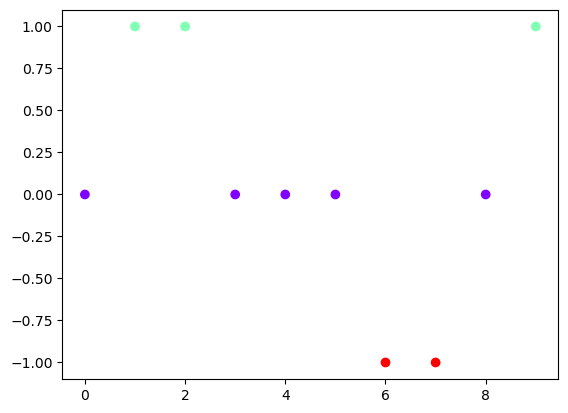

In [7]:
# plot the data points and their clusters
plt.scatter(range(len(sentiments_array)), sentiments_array, c=kmeans.labels_, cmap='rainbow')
plt.show()